# Random Forest

## DRILL: Third Attempt

by: Melissa N 

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display


In [71]:
df = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
y2015 = df

## Make df first and keep 

In [74]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [76]:
print('Number of columns:', len(y2015.columns))

Number of columns: 111


In [77]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
12
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [78]:
#y2015['int_rate']

In [79]:
 #Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

 #Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [80]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [82]:
print('Number of columns:', len(y2015.columns))

Number of columns: 103


In [83]:
y2015.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=103)

In [84]:
#plt.figure(figsize=(20, 20))
#correlation_matrix_y15 = y2015.corr()
#sns.heatmap(correlation_matrix_y15, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
#plt.show()

For this correlation matrix, it is hard to see what is happening.  
We can see that the feature __policy_code__ does not have any relation with other features so we will remove it.  

In [85]:
# Drop the column with policy_code
# It doesn't have a relation with any of other features
y2015.drop(['policy_code'], 1, inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
print('Number of columns:', len(y2015.columns))

Number of columns: 102


Next, we are going to delete any highly related features.  
This mean anything that has a a correlation __less than 0.5__   
This will help in seeing if we can get a readable correlation matrix.

In [87]:
#y2015.corr().abs().loc[:,'loan_status']
#c= y2015['loan_status']
#corr_mat= c.corr()
#display(c)

In [88]:
### Make it so that it removes what has loose correlation to loan staust (<=0.5)

# Create a correlation matrix and  loosely correlated columns (< 0.5).
#col_corr = set() 
#corr_matrix = y2015.corr().abs().loc[:,'loan_status']

#for i in range(len(corr_matrix.index)):
#    if corr_matrix.iloc[i,0] <= 0.5:
#        colname = corr_matrix.index[i] 
#        col_corr.add(colname)
#        if colname in y2015.columns:
#            del y2015[colname] 
#corr_matrix

In [89]:

# Create a correlation matrix and  loosely correlated columns (< 0.5).
col_corr = set() 
corr_matrix = y2015.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] <= 0.5:
            colname = corr_matrix.columns[i] 
            col_corr.add(colname)
            if colname in y2015.columns:
                del y2015[colname] 
corr_matrix

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,1.000000,0.997540,0.008288,0.008288,0.008554,0.053402,0.012919,0.015055,0.005692,0.002300,...,0.000612,0.008886,0.010366,0.034963,0.004595,0.000991,0.015609,0.012864,0.017944,0.020870
member_id,0.997540,1.000000,0.008620,0.008620,0.008885,0.053447,0.013274,0.014958,0.005806,0.002261,...,0.000700,0.008723,0.010437,0.034596,0.004625,0.000908,0.015297,0.012688,0.017822,0.020684
loan_amnt,0.008288,0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,0.010424,...,0.031334,0.042158,0.105056,0.031516,0.124430,0.002087,0.347289,0.289565,0.395843,0.203093
funded_amnt,0.008288,0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,0.010424,...,0.031334,0.042158,0.105056,0.031516,0.124430,0.002087,0.347289,0.289565,0.395843,0.203093
funded_amnt_inv,0.008554,0.008885,0.999994,0.999994,1.000000,0.140209,0.941187,0.305803,0.006044,0.010448,...,0.031349,0.042263,0.105096,0.031382,0.124394,0.002070,0.347355,0.289554,0.395973,0.203085
int_rate,0.053402,0.053447,0.140572,0.140572,0.140209,1.000000,0.124426,0.090399,0.077932,0.043710,...,0.031344,0.256831,0.061652,0.233942,0.065078,0.012234,0.121081,0.000676,0.257222,0.004055
installment,0.012919,0.013274,0.941205,0.941205,0.941187,0.124426,1.000000,0.297393,0.001893,0.002129,...,0.024302,0.010656,0.085217,0.038320,0.112663,0.010279,0.315373,0.265224,0.358718,0.181215
annual_inc,0.015055,0.014958,0.305734,0.305734,0.305803,0.090399,0.297393,1.000000,0.068237,0.037910,...,0.005709,0.045330,0.005866,0.015209,0.050312,0.038323,0.391129,0.297563,0.257184,0.242637
dti,0.005692,0.005806,0.006103,0.006103,0.006044,0.077932,0.001893,0.068237,1.000000,0.005868,...,0.005476,0.031698,0.042020,0.063826,0.015054,0.014954,0.000674,0.100831,0.012969,0.113685
delinq_2yrs,0.002300,0.002261,0.010424,0.010424,0.010448,0.043710,0.002129,0.037910,0.005868,1.000000,...,0.649762,0.017943,0.451422,0.016562,0.040508,0.011366,0.059349,0.026929,0.081793,0.061466


In [156]:
corr_matrix.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,1.000000,0.997540,0.008288,0.008288,0.008554,0.053402,0.012919,0.015055,0.005692,0.002300,...,0.000612,0.008886,0.010366,0.034963,0.004595,0.000991,0.015609,0.012864,0.017944,0.020870
member_id,0.997540,1.000000,0.008620,0.008620,0.008885,0.053447,0.013274,0.014958,0.005806,0.002261,...,0.000700,0.008723,0.010437,0.034596,0.004625,0.000908,0.015297,0.012688,0.017822,0.020684
loan_amnt,0.008288,0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,0.010424,...,0.031334,0.042158,0.105056,0.031516,0.124430,0.002087,0.347289,0.289565,0.395843,0.203093
funded_amnt,0.008288,0.008620,1.000000,1.000000,0.999994,0.140572,0.941205,0.305734,0.006103,0.010424,...,0.031334,0.042158,0.105056,0.031516,0.124430,0.002087,0.347289,0.289565,0.395843,0.203093
funded_amnt_inv,0.008554,0.008885,0.999994,0.999994,1.000000,0.140209,0.941187,0.305803,0.006044,0.010448,...,0.031349,0.042263,0.105096,0.031382,0.124394,0.002070,0.347355,0.289554,0.395973,0.203085


In [90]:
print('Number of columns:', len(corr_matrix.columns))

Number of columns: 86


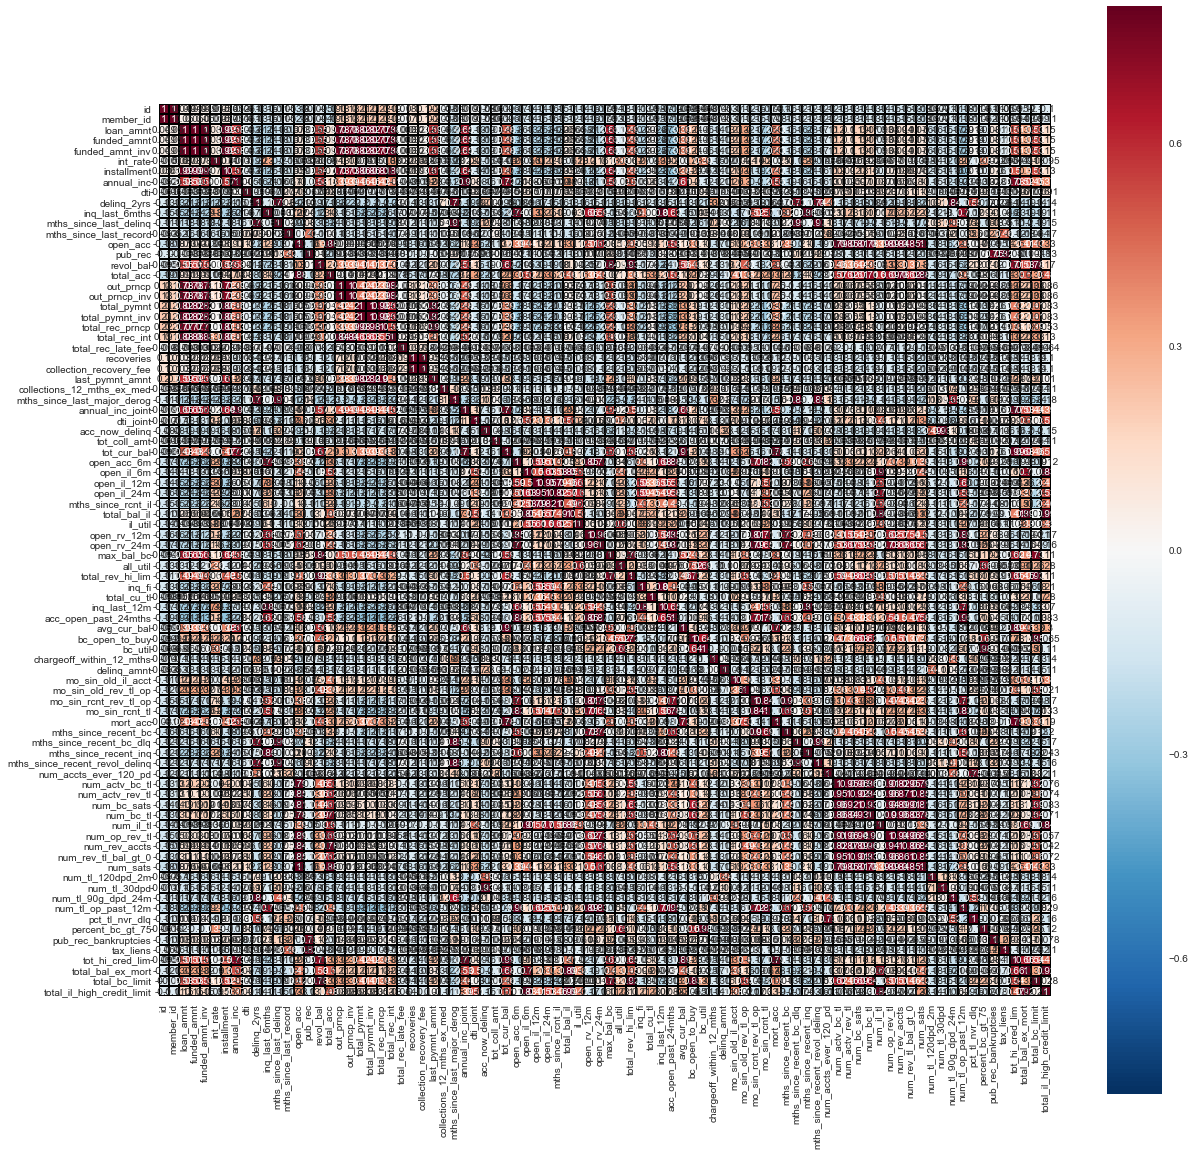

In [150]:
plt.figure(figsize=(20, 20))
correlation_matrix = corr_matrix.corr()
sns.heatmap(correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In [92]:
# Run the Random Forest classifier.
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

print('Scores:', cross_val_score(rfc, X, Y, cv=10))

print('\nAverage score:', cross_val_score(rfc, X, Y, cv=10).mean())

Scores: [ 0.88546935  0.90902615  0.88247726  0.90439553  0.83077654  0.89057231
  0.77040538  0.91465007  0.90878001  0.92146012]

Average score: 0.875893065762


This is not overfitting too much. 
It seems to predict well on the __Hold Out groups___ or test groups. 

In [122]:
y2015['loan_Current'] = np.where(y2015['loan_status'] =='Current', 1, 0)
y2015['loan_Paid'] = np.where(y2015['loan_status'] =='Fully Paid', 1, 0)
y2015['loan_Late'] = np.where(y2015['loan_status'] =='Late (31-120 days)', 1, 0)

#y2015['loan_good'] = np.where(y2015['loan_status'] =='Current'|y2015['loan_status'] =='Fully Paid', 1, 0)
Y1 = y2015['loan_Current']
Y2 = y2015['loan_Paid']
Y3 = y2015['loan_Late'] 

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

In [126]:
y2015['loan_status'].value_counts()

Current               287414
Fully Paid             87989
Charged Off            29178
Late (31-120 days)      9510
In Grace Period         4320
Late (16-30 days)       1888
Default                  796
Name: loan_status, dtype: int64

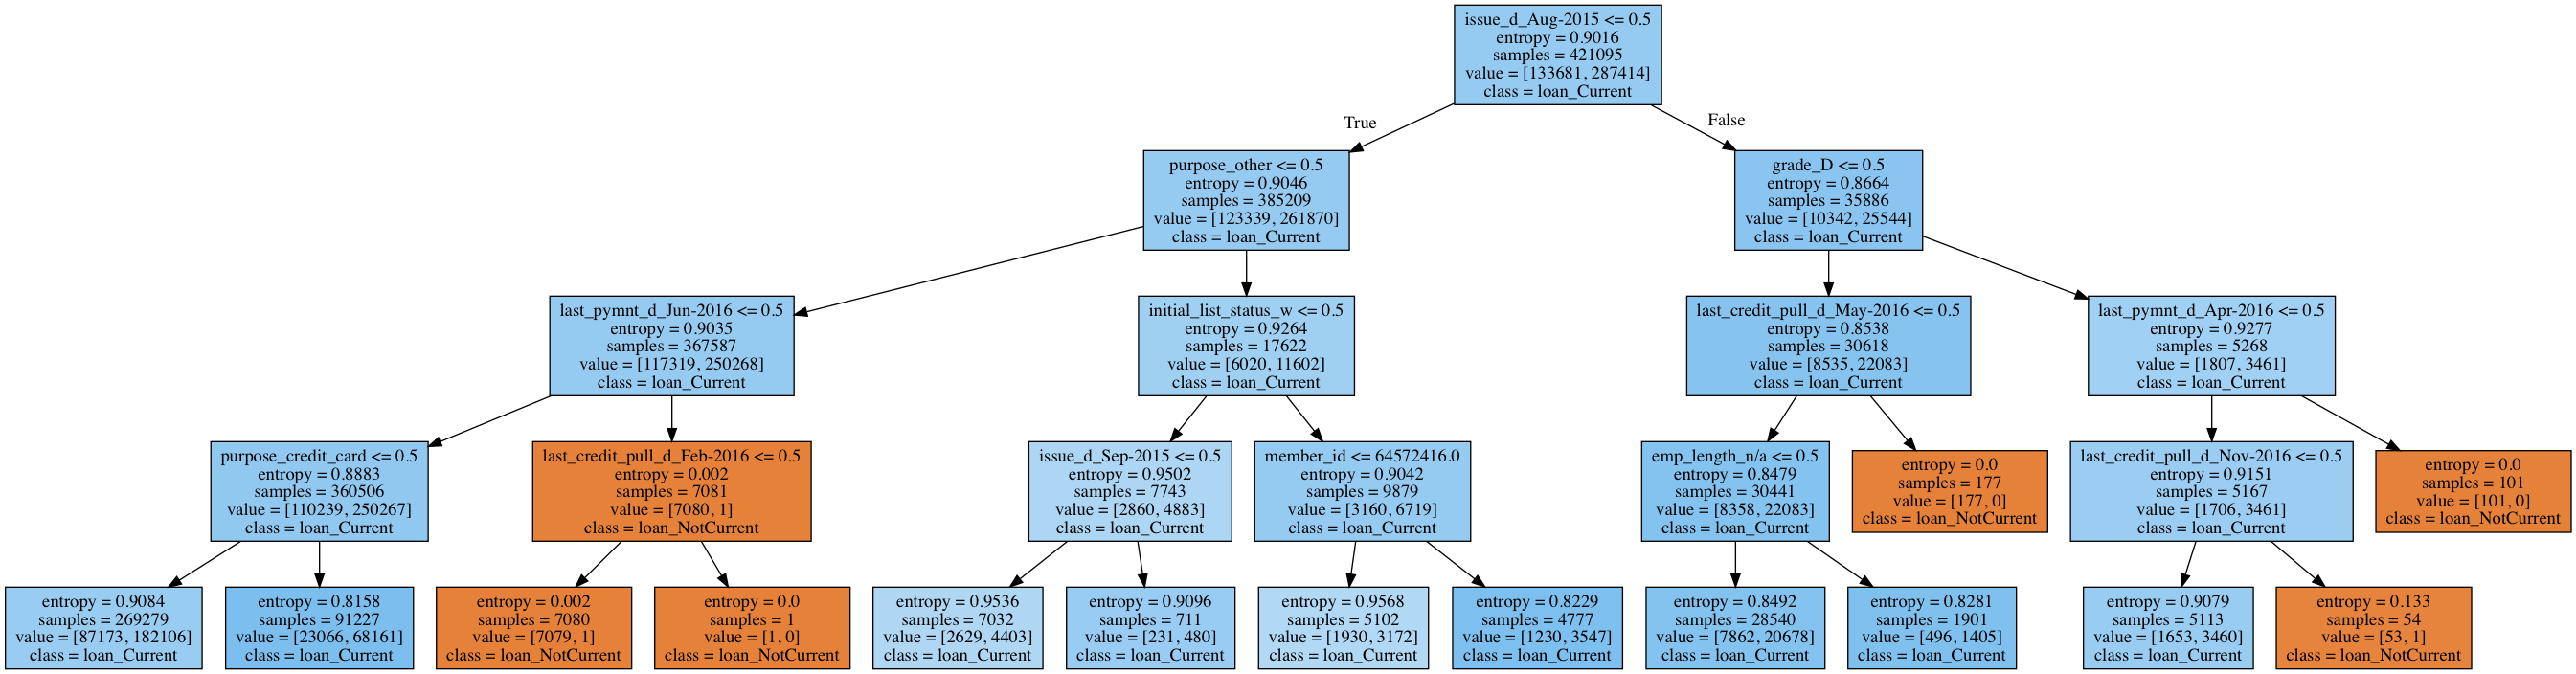

In [127]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(X, Y1)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X.columns,
    class_names=['loan_NotCurrent', 'loan_Current'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

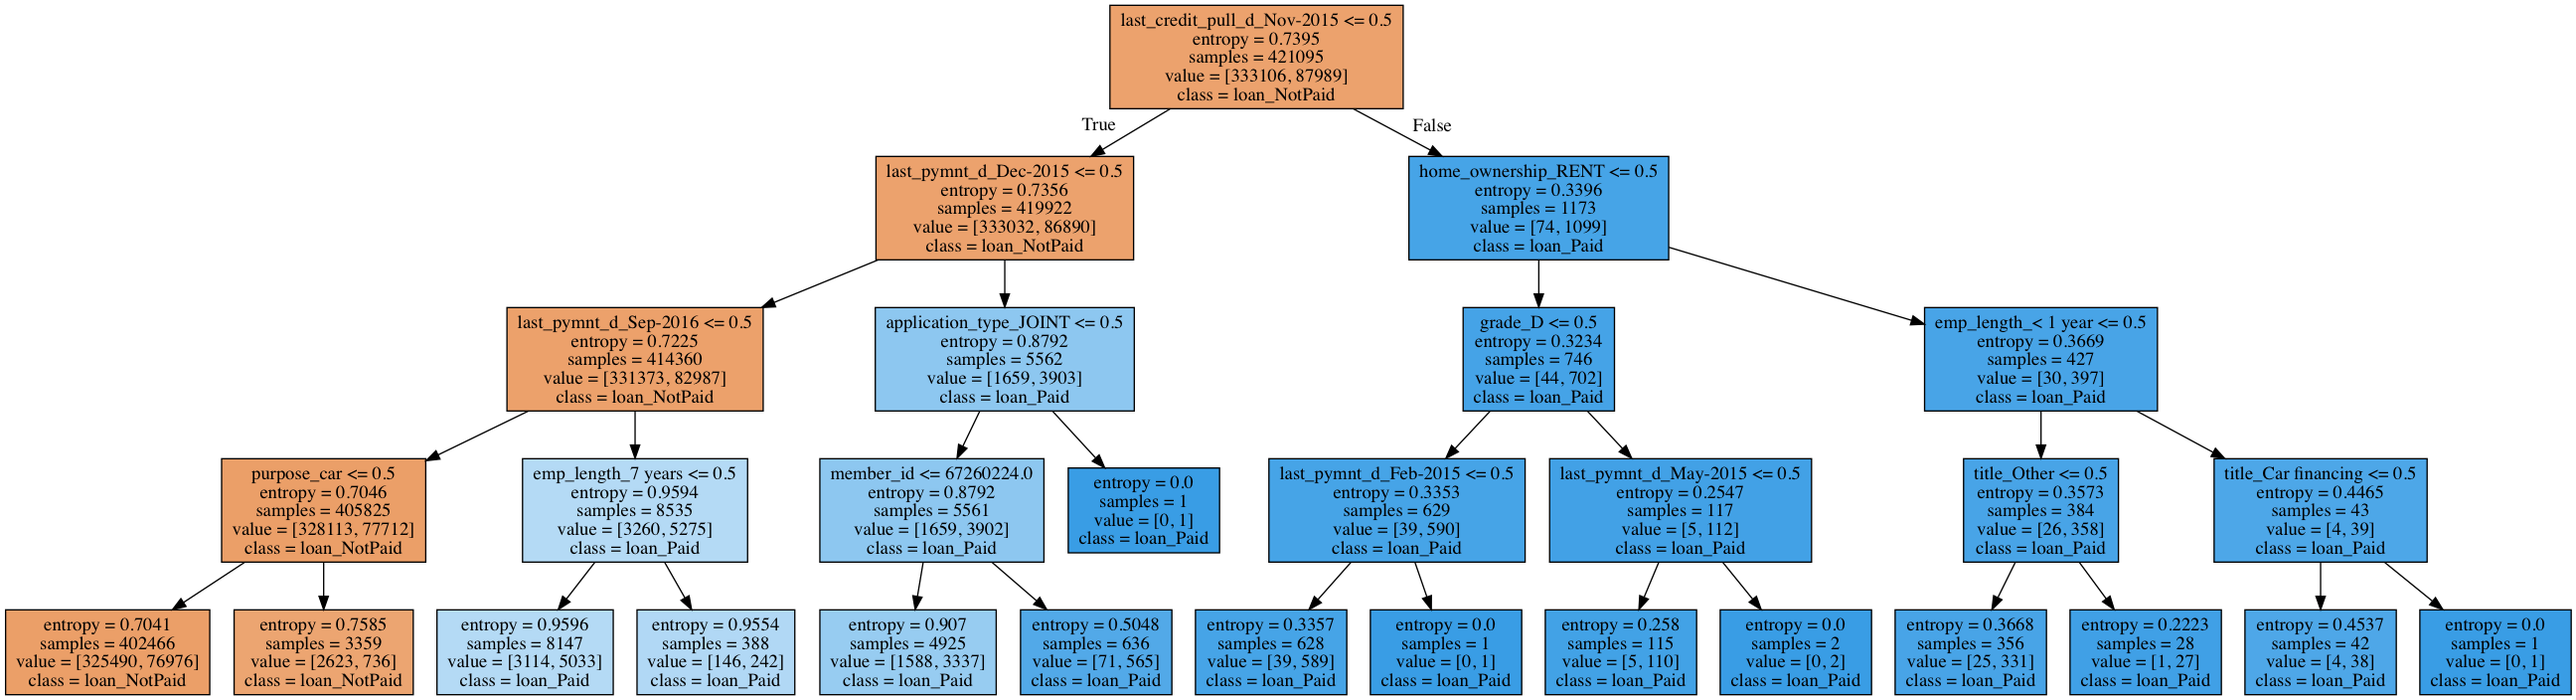

In [130]:
# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(X, Y2)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X.columns,
    class_names=['loan_NotPaid', 'loan_Paid'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

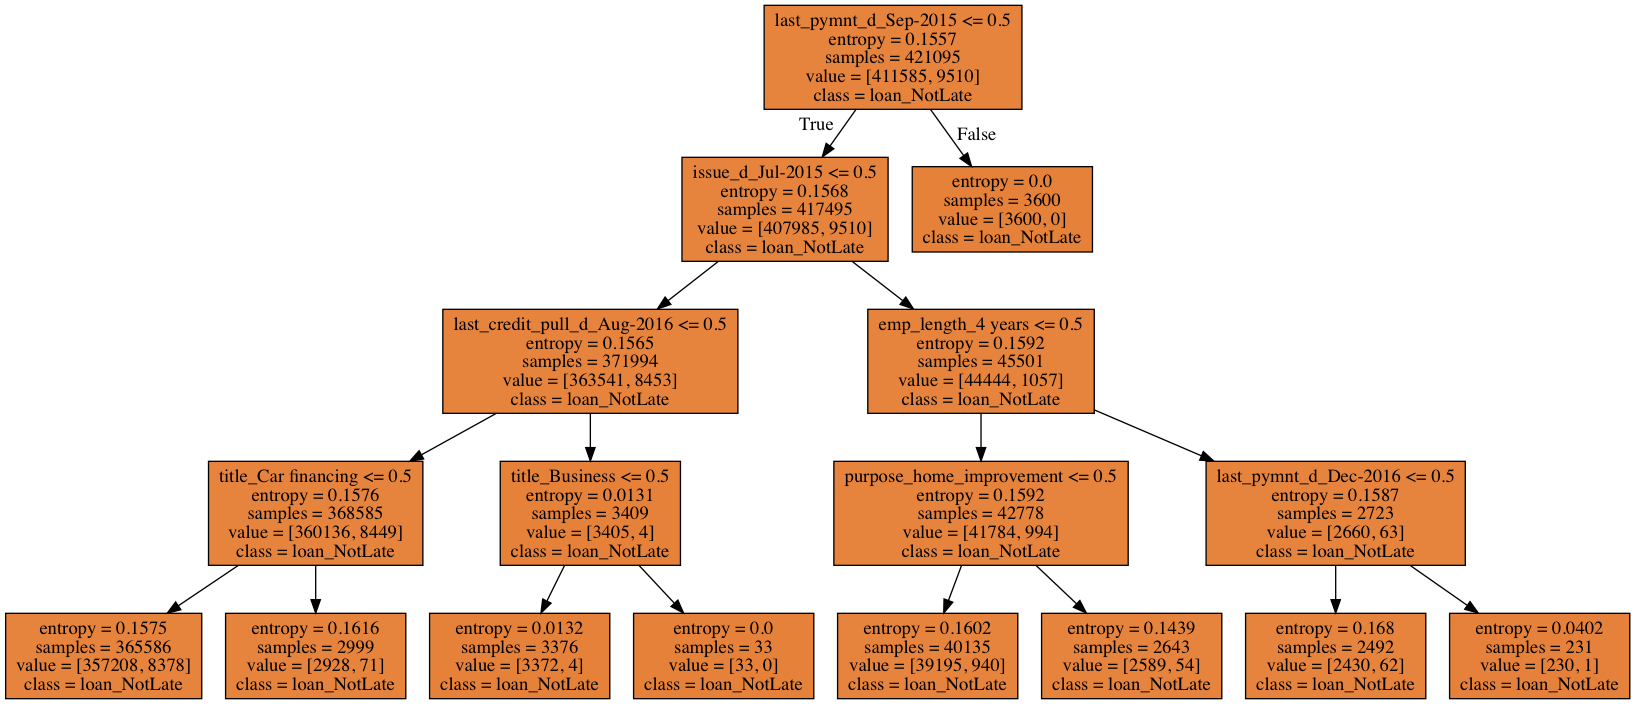

In [129]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(X, Y3)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X.columns,
    class_names=['loan_NotLate', 'loan_Late'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
### Do Correlation Matrix Here
### Figure out which ones have a good correlation
###After dropping features with low correlation with the outcomes (5 of them)
### See what the cross validation score is and drop until it is 90%

### Do a Decision Tree instead of Forest Model ===> this is how you look inside the Black Box

### After Drop make sure also dropping the columns with low correlation in both places. Drop from y2015 and create X 

In [16]:
#This is not needed when I am doing the Drill 

#pd.get_dummies(y2015).head()

In [108]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.97152763,  0.98900525,  0.98784166,  0.98812662,  0.99121349,
        0.99130848,  0.99107079,  0.98781733,  0.98938419,  0.98914644])

In [154]:
display(X.head())

,id,member_id,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
